In [2]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.optimize import curve_fit
#import mpmath as mm
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    






#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#w without specific declear should of value 10
w = 10.
#theta_e_1 = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.
#n_e = 4.
h = 6.6260755e-27
k = 1.380658e-16
T_e = m * c**2 * theta_e / k


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)

kappa = 3.5
theta = 12. * np.pi / 36.
epsilon = 0.01
n_e = 1.
nu_c = e * B / (2. * np.pi * m * c)
nu = 100 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
nu_k = nu_c * w**2. * np.sin(theta)
nu_w = nu_c * (w * kappa)**2 * np.sin(theta)
#n_e_nt = 2.
#p_PL = 2.2
p_PL = 2.5
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001

gamma_cutoff = 100000000000.
#print nu_c

(array([ 2.45865024, -2.37823273, -2.46123573,  0.4751667 ]), array([[ 0.00683407,  0.00597953, -0.00669559,  0.00072186],
       [ 0.00597953,  0.01419222, -0.00515739,  0.00213048],
       [-0.00669559, -0.00515739,  0.00669595, -0.00058998],
       [ 0.00072186,  0.00213048, -0.00058998,  0.00032743]]))
[ 0.17364818  0.34202014  0.5         0.64278761  0.76604444  0.8660254
  0.93969262  0.96592583  0.98480775  0.9961947 ]


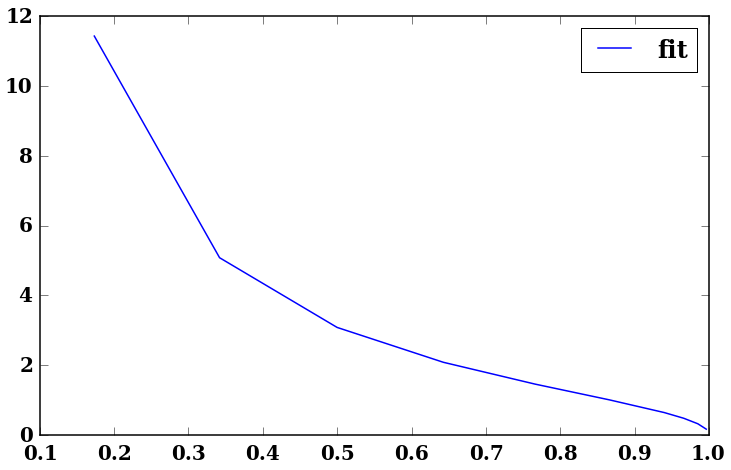

In [71]:
data_kappa_V_low_theta_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_low_theta_fit.txt')

x_514 = np.sin(data_kappa_V_low_theta_fit[:,0] * np.pi /180.)
y_514 = data_kappa_V_low_theta_fit[:,1]

def func_130(x,a,b, d, f):
    f = (a * x**b + d)**(f)
    return f

print curve_fit(func_130, x_514, y_514, p0 = [ 2.45865026, -2.37823266, -2.46123574,  0.47516671])


#pl.plot(x_514, y_514, label = 'data')
pl.plot(x_514, func_130(x_514, (39./25.)**2., -12./5., - (39./25.)**2.,  12./25.), label = 'fit')


pl.legend()


print x_514

In [62]:
np.sin(np.pi * 10./180.)

0.17364817766693033

In [72]:
func_130(np.sin(np.pi/3), (39./25.)**2., -12./5., - (39./25.)**2.,  12./25.)

1.0016159548058734